# Exploratory Data Analysis

The objective of this notebook is to explore the distributions and relationships of the cleaned data, identify patterns, anomalies and outliers, and generate hypotheses that may guide the further RFM modeling and clustering processes.

The notebook is divided in the following sub-sections:
- Overview of the cleaned dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../data_clean/clean_online_retail.csv"
df = pd.read_csv(path)

## Overview of the cleaned dataset
Before starting with the exploratory analysis, it is necessary to obtain a general overview of the cleaned dataset. Therefore, the following questions will be answered:
1. What are the main variables of the final dataset?
2. How many transactions does the dataset contain?
3. How many unique customers are represented in the dataset?

### 1. What are the main variables of the final dataset?
The dataset is compound of the following 9 columns:
| Column | Data Type | Description |
|---|---|---|
| Invoice | Nominal, String | A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. |
| StockCode | Nominal, String | A 5-digit integral number uniquely assigned to each distinct product. |
| Description | Nominal, String | Product item name. |
| Quantity | Numeric, Int64 | The quantities of each product (item) per transaction. |
| InvoiceDate | Numeric, DateTime64 [us] | The day and time when a transaction was generated. |
| Price | Numeric, Float64 | Product price per unit in sterling |
| Customer ID | Nominal, Int64 | A 5-digit integral number uniquely assigned to each customer. |
| Country | Nominal, String | The name of the country where a customer resides. |
| TotalPrice | Numeric, Float64 | The total monetary value of the transaction (_Quantity_ x _Price_). |

### 2. How many transactions does the dataset contain?
Each row in the dataset represents a registered monetary transaction of one single product of the total purchase.

In [12]:
df.shape

(779423, 9)

The dataset contains 779,423 transactions in total, which provides a rich basis for analyzing customer purchasing behavior.

### 3. How many unique customers are represented in the dataset?

In [13]:
df['Customer ID'].unique().shape

(5878,)

The dataset includes 5,878 unique customers during the analyzed period.

This count represents the customers observed in the dataset and does not necessarily correspond to the total number of customers of the company.

## Transaction distributions analysis
Visualizing the distributions of the numeric columns values of the transactions can help us to identify outliers and biases in the data that could distortion RFM analysis and clustering. The following graphs will be used to fulfill this task:
- Boxplots: Besides displaying the five number summary of a set of data, boxplots also are often used to easily detect outliers and symetry; for that reason, this graph will be used to display the outliers.
- Histograms: Displays the frequency distribution of a single numerical variable; for that reason, this graph will be used to visualize the overall columns data.

### <font color='#3C3CE8'>Quantity column distribution</font>

### Main statistical measures of the quantity of products in each transaction

In [14]:
df['Quantity'].describe()

count    779423.000000
mean         13.489016
std         145.855640
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

The describe method result showed a wide distribution of the quantity of products values, as shows: the standard deviation value, the mean that is over two times the median, and the contrast between the min and max values. A deeper distribution analysis must be done in future steps to clearly understand the magnitude of the dispersion and how it could affect the RFM analysis.

### Outliers identification in the quantity of products ordered
To verify and comprehend the quantity variability, having an idea of the amount of quantity outliers is a must. 

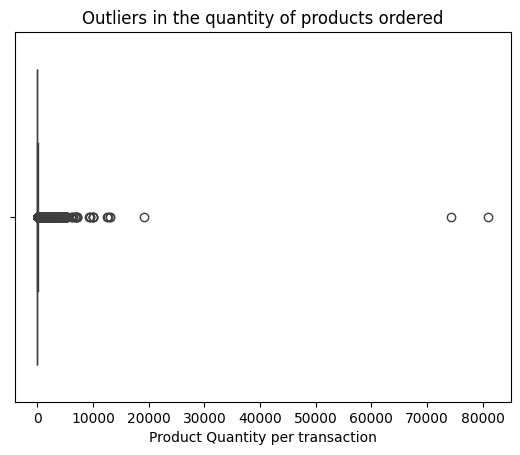

In [26]:
sns.boxplot(x=df['Quantity'])
plt.title("Outliers in the quantity of products ordered")
plt.xlabel("Product Quantity per transaction")
plt.show()

The quantity distribution has a big amount of outliers, some values are even reaching the 80,000s. This data behaviour can have a great impact in the RFM analysis due to the enormous gap between them and the rest of the data; however, the outliers will continue to be considered in the analysis since they are aprt of the users' purchase history and represents the wholesale customer segment.

### Distribution of the quantity of products ordered in each transaction
The quantity distribution will be displayed using histograms, where the skewness of the data will become clear.

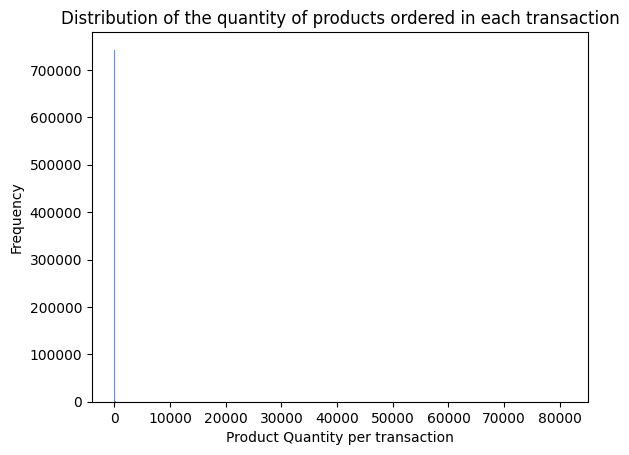

In [27]:
plt.figure()
sns.histplot(data=df, x='Quantity', color="royalblue")
plt.title("Distribution of the quantity of products ordered in each transaction")
plt.xlabel("Product Quantity per transaction")
plt.ylabel("Frequency")
plt.show()

The intepretation of the graph in the current scale is hard due to the enormous gap between frequency in products orders. We must transform the column data to plot a better visualization.

### Distribution of the quantity of products ordered in each transaction in logaritmic scale
Logarithmic scale was implemented to improve histogram visualization.

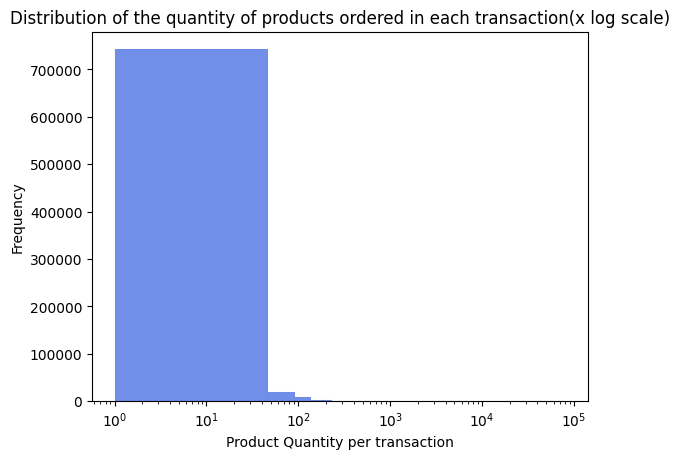

In [28]:
plt.figure()
sns.histplot(data=df, x='Quantity', color="royalblue")
plt.title("Distribution of the quantity of products ordered in each transaction(x log scale)")
plt.xlabel("Product Quantity per transaction")
plt.ylabel("Frequency")
plt.xscale('log')
plt.show()

As we can see, the product quantity data has a positive skew, showig that most of the customers buy at a low scale, but only a few segment of them are showing a wholesaler behavior by buying extreme quantities of products.

Price column distribution